# Đọc file và kiểm tra

In [116]:

# import librosa
# y, sr = librosa.load("Sound/hello/hello_1.wav")
# mfccs = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=1)
# print(mfccs.shape)
# print(mfccs)

In [117]:
import os 


sound_folder = 'audio/audio/'
folder_list = os.listdir(sound_folder)

# for folder in folder_list:
#     print()
#     print("Folder: " + folder)
#     for file in os.listdir(sound_folder + folder + '/'):
#         print(file)

# Biến đổi đầu vào và gắn nhãn

In [118]:
import librosa


#create label_list and mfcc_list
mfcc_list = []
label_list = []


# each folder is label because each label have many file sound
for folder in folder_list:
    for file in os.listdir(sound_folder + folder + '/'):
        y, sr = librosa.load(os.path.join(sound_folder, folder, file), sr = 8000)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)
        
        label_list.append(folder)
        mfcc_list.append(mfcc)

print(label_list)

        

['bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye'

In [119]:
# for x in range(len(mfcc_list)):
#     print(mfcc_list[x].shape)

# Xử lý dữ liệu đầu vào

In [120]:
import numpy as np

# Số đặc trưng mong muốn
desired_num_features = 50
processed_mfcc_list = []
# Cắt hoặc zero-padding các khung MFCC để có cùng số đặc trưng
def process_mfcc(mfcc):
    if mfcc.shape[1] > desired_num_features:
        mfcc = mfcc[:, :desired_num_features]
    elif mfcc.shape[1] < desired_num_features:
        num_missing_features = desired_num_features - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, num_missing_features)), mode='constant')
    return mfcc


for mfcc in mfcc_list:
    processed_mfcc = process_mfcc(mfcc)
    processed_mfcc_list.append(processed_mfcc)


    
# for mfcc in processed_mfcc_list:
#     print(mfcc.shape)

In [121]:

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(label_list)

one_hot_labels  = to_categorical(encoded_labels)

label_arr = np.asarray(encoded_labels)
mfcc_arr = np.asarray(processed_mfcc_list)


print(label_arr)
print(len(mfcc_arr))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]
376


In [122]:
#print(mfcc_arr)
print(mfcc_arr[1].shape)

(12, 50)


In [123]:
print(len(label_arr))
print(len(mfcc_arr))

376
376


In [124]:
from sklearn.model_selection import train_test_split

# Tách tập dữ liệu huấn luyện thành tập huấn luyện và tập validation
#X_train, X_val, y_train, y_val = train_test_split(mfcc_arr, label_arr, test_size=0.4, random_state=42)

# Sử dụng X_train và y_train để huấn luyện mô hình
# Sử dụng X_val và y_val để đánh giá mô hình
X_train_val, X_test, y_train_val, y_test = train_test_split(mfcc_arr, label_arr, test_size=0.3)

# Chia tập còn lại thành tập validation và tập kiểm tra
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

print(y_train)
print(y_val)

[2 2 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 2 1 2 1 2 0 0 1 0 0 2 0 2 2 0 0 2 0
 0 0 2 0 0 2 2 2 2 0 0 2 0 0 1 0 0 0 0 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 1 1 0
 1 1 0 0 2 1 2 1 0 1 0 0 0 1 1 0 2 2 0 1 0 0 0 1 1 0 0 1 0 1 2 1 1 1 0 2 1
 2 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 0]
[0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 2 1 1 2 1 1 2
 2 2 2 0 0 1 0 1 1 1 1 2 2 1 2 1 2 0 1 2 0 2 0 0 1 1 1 2 0 2 1 0 1 1 1 2 1
 2 1 1 0 1 1 1 2 1 2 2 2 2 0 0 1 0 2 0 1 0 0 0 2 0 1 1 1 0 1 0 2 1 0 0 1 0
 1 1 2 1 2 2 1 0 2 0 2 0 1 1 0 1 2 0 0 1 0]


# Huấn luyện bằng mô hình RNN


In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from keras.layers import LSTM, Dense

# Xây dựng mô hình
model = Sequential()
#model.add(LSTM(32, input_shape=(12, 50)))#
model.add(SimpleRNN(units=12, input_shape = (12 ,50)))
model.add(Dropout(0.2))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Biên dịch và huấn luyện mô hình
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(mfcc_arr, label_arr, batch_size=32, epochs=30,validation_data=(X_val, y_val) )

#model.save('my_model.h5')

Epoch 1/30
12/12 [==============================] - 3s 70ms/step - loss: 1.2465 - accuracy: 0.2793 - val_loss: 1.1483 - val_accuracy: 0.2273
Epoch 2/30
12/12 [==============================] - 0s 13ms/step - loss: 1.1224 - accuracy: 0.3324 - val_loss: 1.0650 - val_accuracy: 0.3485
Epoch 3/30
12/12 [==============================] - 0s 15ms/step - loss: 1.0514 - accuracy: 0.4149 - val_loss: 1.0196 - val_accuracy: 0.4621
Epoch 4/30
12/12 [==============================] - 0s 12ms/step - loss: 1.0203 - accuracy: 0.4867 - val_loss: 0.9835 - val_accuracy: 0.5303
Epoch 5/30
12/12 [==============================] - 0s 12ms/step - loss: 0.9846 - accuracy: 0.5452 - val_loss: 0.9464 - val_accuracy: 0.6515
Epoch 6/30
12/12 [==============================] - 0s 12ms/step - loss: 0.9689 - accuracy: 0.5293 - val_loss: 0.9118 - val_accuracy: 0.7121
Epoch 7/30
12/12 [==============================] - 0s 11ms/step - loss: 0.9273 - accuracy: 0.5745 - val_loss: 0.8808 - val_accuracy: 0.7348
Epoch 8/30
12

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                10624     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 3)                 99        
                                                                 
Total params: 11,779
Trainable params: 11,779
Non-trainable params: 0
_________________________________________________________________


#DỰ ĐOÁN

In [131]:
y_pred = []
for x in range(len(X_test)):
    new_data = X_test[x].reshape((1,12,50))
    predictions = model.predict(new_data)
    predicted_labels = np.argmax(predictions, axis=1)
    y_pred.append(int(predicted_labels))
    print(y_test[x], "Predict ", predicted_labels)

1/1 [==============================] - 0s 450ms/step
0 Predict  [0]
1/1 [==============================] - 0s 42ms/step
0 Predict  [0]
1/1 [==============================] - 0s 40ms/step
0 Predict  [2]
1/1 [==============================] - 0s 39ms/step
1 Predict  [1]
1/1 [==============================] - 0s 35ms/step
0 Predict  [0]
1/1 [==============================] - 0s 42ms/step
1 Predict  [1]
1/1 [==============================] - 0s 39ms/step
1 Predict  [1]
1/1 [==============================] - 0s 49ms/step
0 Predict  [0]
1/1 [==============================] - 0s 46ms/step
0 Predict  [0]
1/1 [==============================] - 0s 40ms/step
1 Predict  [1]
1/1 [==============================] - 0s 39ms/step
0 Predict  [0]
1/1 [==============================] - 0s 41ms/step
1 Predict  [1]
1/1 [==============================] - 0s 51ms/step
2 Predict  [2]
1/1 [==============================] - 0s 41ms/step
1 Predict  [1]
1/1 [==============================] - 0s 33ms/step
2 Predict

In [132]:
print(y_pred)
y_test = list(y_test)
print(y_test)


[0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0]


In [135]:
def plot_confusion_matrix(confusion_matrix, labels):
    
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='BuPu')

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Đưa ra giá trị trên từng ô
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j],
                           ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.show()

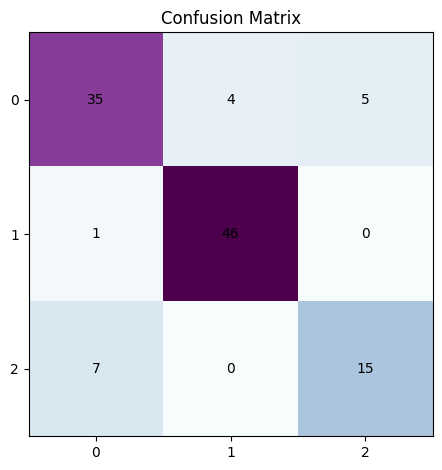

In [136]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_test,y_pred)

labels = np.unique(y_test)

plot_confusion_matrix(confusion_matrix1, labels)

In [137]:
sound_folder = 'Test/'
folder_list = os.listdir(sound_folder)

for folder in folder_list:
    print()
    print("Folder: " + folder)
    for file in os.listdir(sound_folder + folder + '/'):

        print(file)


Folder: bye
bye_1.wav
bye_2.wav
bye_3.wav
bye_30.wav
bye_4.wav
bye_5.wav
bye_6.wav

Folder: code
code_1 (2).wav
code_1.wav
code_2.wav
code_3.wav
code_4.wav
code_5.wav
code_6.wav

Folder: date
date_1.wav
date_2.wav
date_3.wav
date_4.wav
date_5.wav
date_6.wav

Folder: game
game_1.wav
game_2.wav
game_3.wav
game_4.wav
game_5.wav
game_6.wav

Folder: hello
hello.wav
hello_1.wav
hello_2.wav
hello_3.wav
hello_4.wav
hello_5.wav
hello_6.wav

Folder: music
music_1.wav
music_2.wav
music_3.wav
music_4.wav
music_5.wav
music_6.wav

Folder: time
time_1.wav
time_2.wav
time_3.wav
time_4.wav
time_5.wav
time_6.wav


In [138]:
test_mfcc_list = []
test_label_list = []

for folder in folder_list:
    for file in os.listdir(sound_folder + folder + '/'):
        y, sr = librosa.load(os.path.join(sound_folder, folder, file), sr = 8000)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)
        
        test_label_list.append(folder)
        test_mfcc_list.append(mfcc)

print(test_label_list)


['bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'code', 'code', 'code', 'code', 'code', 'code', 'code', 'date', 'date', 'date', 'date', 'date', 'date', 'game', 'game', 'game', 'game', 'game', 'game', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'music', 'music', 'music', 'music', 'music', 'music', 'time', 'time', 'time', 'time', 'time', 'time']


In [139]:
desired_num_features = 50
processed_mfcc_list = []
# Cắt hoặc zero-padding các khung MFCC để có cùng số đặc trưng
def process_mfcc(mfcc):
    if mfcc.shape[1] > desired_num_features:
        mfcc = mfcc[:, :desired_num_features]
    elif mfcc.shape[1] < desired_num_features:
        num_missing_features = desired_num_features - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, num_missing_features)), mode='constant')
    return mfcc


for mfcc in test_mfcc_list:
    processed_mfcc = process_mfcc(mfcc)
    processed_mfcc_list.append(processed_mfcc)


In [140]:

mfcc_arr = np.asarray(processed_mfcc_list)


In [141]:
for x in range(len(mfcc_arr)):
    new_data = mfcc_arr[x].reshape((1,12,50))
    predictions = model.predict(new_data)
    #print(predictions)
    predicted_labels = np.argmax(predictions, axis=1)
    #print(predicted_labels
    decoded_labels = label_encoder.inverse_transform(predicted_labels)
    print(test_label_list[x],"predict" , decoded_labels)

1/1 [==============================] - 0s 39ms/step
bye predict ['bye']
1/1 [==============================] - 0s 46ms/step
bye predict ['code']
1/1 [==============================] - 0s 57ms/step
bye predict ['code']
1/1 [==============================] - 0s 33ms/step
bye predict ['code']
1/1 [==============================] - 0s 37ms/step
bye predict ['code']
1/1 [==============================] - 0s 42ms/step
bye predict ['hello']
1/1 [==============================] - 0s 51ms/step
bye predict ['hello']
1/1 [==============================] - 0s 39ms/step
code predict ['bye']
1/1 [==============================] - 0s 44ms/step
code predict ['code']
1/1 [==============================] - 0s 34ms/step
code predict ['code']
1/1 [==============================] - 0s 41ms/step
code predict ['code']
1/1 [==============================] - 0s 49ms/step
code predict ['code']
1/1 [==============================] - 0s 56ms/step
code predict ['code']
1/1 [==============================] - 0s 44m

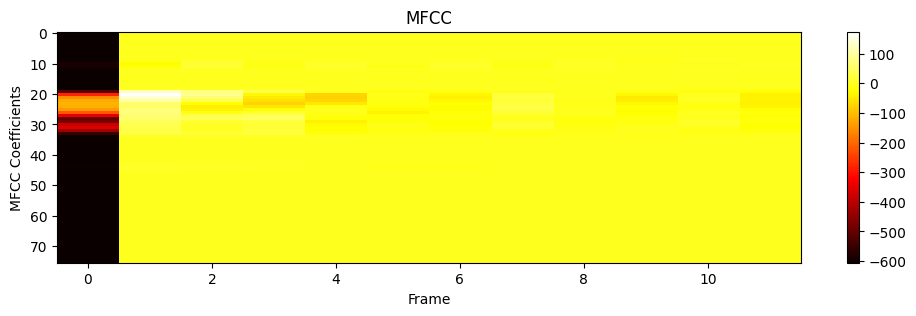

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Giả định bạn đã có ma trận MFCC đã tính toán được
mfcc_matrix = mfcc_list[0] # Giả định ma trận MFCC có kích thước 100x13

# Biểu diễn ma trận MFCC trên biểu đồ
plt.figure(figsize=(12, 3))
plt.imshow(mfcc_matrix.T, cmap='hot', origin='upper', aspect='auto')
plt.colorbar()
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficients')
plt.title('MFCC')
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# for z in range(0,len(mfcc_list)):

# # Giả định bạn đã có một mảng các hệ số MFCC
#     mfcc_coeffs = mfcc_list[z]  # Giả định ma trận MFCC có kích thước 100x13

#     # Tạo biểu đồ đường cho các hệ số MFCC
#     plt.figure(figsize=(3, 1))
#     for i in range(13):
#         plt.plot(mfcc_coeffs[:, i], label=f'MFCC {i+1}')

#     plt.xlabel('Frame')
#     plt.ylabel('MFCC Coefficient Value')
#     plt.title('MFCC Coefficients')
#     #plt.legend()
#     plt.show()